In [4]:
from analysis_tools import Analyzer
from generators.storage import Smirnov, Block, BCType
import numpy as np
import os
import config

In [5]:
prefix = 'Smirnov_'

# Задание параметров блока

In [6]:
step = 0.01
n = 100
size = n * step

mesh = np.meshgrid(np.linspace(0, size, n), np.linspace(0, size, n), np.linspace(0, size, n))
block = Block(
    shape=(n, n, n),
    mesh=(mesh[1], mesh[0], mesh[2]),
    bc=[(BCType.NotWall, BCType.NotWall), (BCType.NotWall, BCType.NotWall), (BCType.NotWall, BCType.NotWall)]
)


# Параметры поля

In [7]:
generator = Smirnov(
    block=block, 
    u_av=(0., 0., 0.),
    l_t=1, tau_t=0.025,
    re_xx=1., re_yy=1., re_zz=1.,
    re_xy=0., re_xz=0., re_yz=0.,
    time_arr=np.array([0]),
    mode_num=1000
)


In [8]:
analyzer = Analyzer(generator)

# Профиль скорости

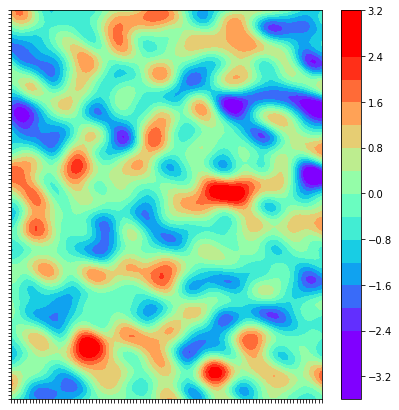

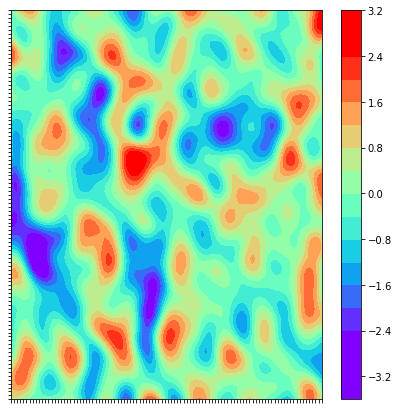

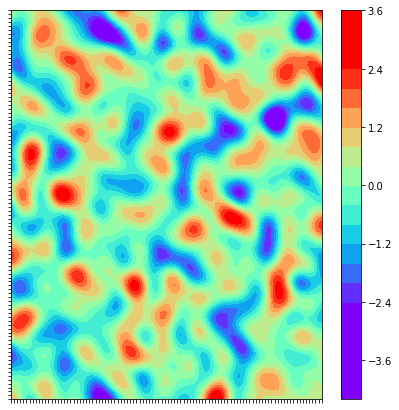

In [11]:
analyzer.plot_2d_velocity_field(
    vmin=-2.5, vmax=2.5, grid=False, num_levels=20, figsize=config.figsize_contour, 
    title=False, title_fsize=18, 
    axes=config.axes_contour,
#     fname=os.path.join(config.pic_dir, prefix + 'velocity_contour')
)

# Пульсации составляющих скорости в точке

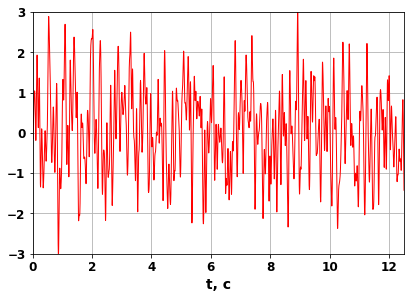

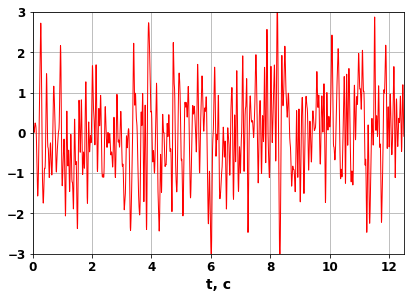

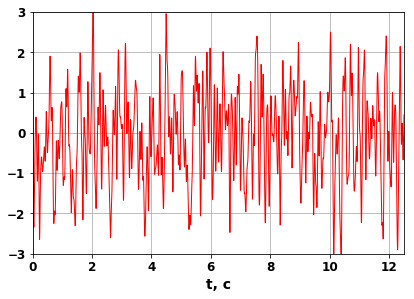

In [15]:
analyzer.plot_velocity_history(
    i=0, j=0, k=0, ts=0.0025, num_ts=5000, figsize=config.figsize_plot, 
    ylim=config.ylim_vel, 
    label_fsize=config.label_fsize, ticks_fsize=config.ticks_fsize, 
    title_fsize=16, title=False, 
    axes=config.axes_plot,
    fname=os.path.join(config.pic_dir, prefix + 'vel_history'), 
)

# График вторых моментов

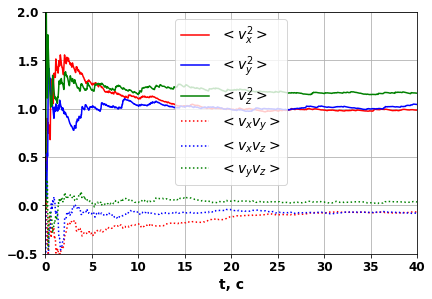

In [39]:
analyzer.plot_moments(
    i=0, j=0, k=0, ts=0.005, num_ts=8000, figsize=config.figsize_plot, 
    ylim=config.ylim_sec_mom, 
    legend_fsize=config.legend_fsize, ticks_fsize=config.ticks_fsize, label_fsize=config.label_fsize, 
    axes=config.axes_plot, 
    fname=os.path.join(config.pic_dir, prefix + 'second_moments')
)

# Двухточечные пространственные корреляции

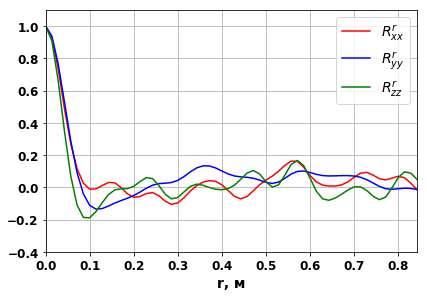

In [29]:
analyzer.plot_two_point_space_correlation(
    i0=0, j0=0, k0=0, ts=0.005, num_ts=5000, di=1, dj=1, dk=0, num=n-40, figsize=config.figsize_plot, 
    label_fsize=config.label_fsize, legend_fsize=config.legend_fsize, ticks_fsize=config.ticks_fsize, 
    ylim=config.ylim_space_cor, axes=config.axes_plot, 
    fname=os.path.join(config.pic_dir, prefix + 'two_point_space_cor')
)

# Автокорреляции

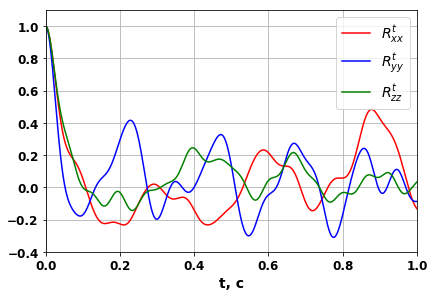

In [38]:
analyzer.plot_two_point_time_correlation(
    i=0, j=0, k=0, t0=0, t1=1, num_dt_av=2000, num_dt=2000, figsize=config.figsize_plot, 
    ylim=config.ylim_auto_cor,
    label_fsize=config.label_fsize, legend_fsize=config.legend_fsize, ticks_fsize=config.ticks_fsize,  
    axes=config.axes_plot, 
    fname=os.path.join(config.pic_dir, prefix + 'auto_cor')
)

# Двумерный спектр

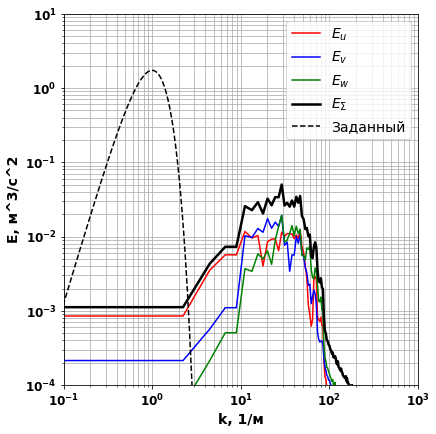

In [40]:
analyzer.plot_spectrum_2d(
    num_pnt=200, figsize=config.figsize_spectrum, 
    ylim=config.ylim_spectrum, xlim=config.xlim_spectrum, 
    label_fsize=config.label_fsize, legend_fsize=config.legend_fsize, ticks_fsize=config.ticks_fsize, 
    axes=config.axes_spectrum,
    #fname=os.path.join(config.pic_dir, prefix + 'spectrum_2d')
)

# Трехмерный спектр

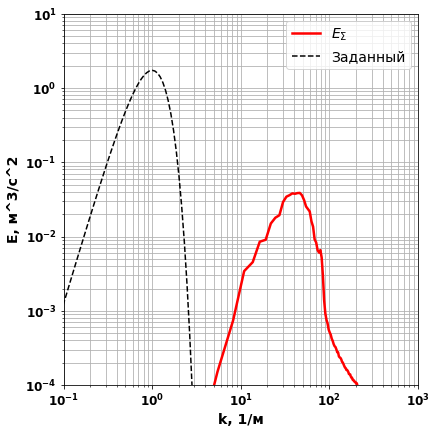

In [41]:
analyzer.plot_spectrum_3d(
    num_pnt=200, figsize=config.figsize_spectrum, 
    ylim=config.ylim_spectrum, xlim=config.xlim_spectrum, 
    label_fsize=config.label_fsize, legend_fsize=config.legend_fsize, ticks_fsize=config.ticks_fsize, 
    axes=config.axes_spectrum,
    #fname=os.path.join(config.pic_dir, prefix + 'spectrum_3d')
)